In [49]:
import random as rnd
import pandas as pd
import numpy as np
import pickle
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def get_compseq(seq):
    comp = {'A' : 'T', 'C' : 'G', 'G' : 'C', 'T':'A'}
    compseq = [comp[b] for b in seq[::-1]]
    return ''.join(compseq)

# load seq input and add its complementary pair 
# return a list with all the seq
def load_ensemble(fname):
    seqs = []
    with open(fname) as inf:
        for line in inf:
            if len(line.strip().split()) >= 1:
                seq = line.strip().split()[0]
                #seq = seq[::-1] #uncomment to make it take 3-5 input 
                comp = get_compseq(seq)

                if comp == seq: # don't want homopolymers 
                    continue

                if seq not in seqs:
                    #seqs.append(seq)
                    seqs.insert(0,seq)
                if comp not in seqs:
                    seqs.append(get_compseq(seq))

    # should filter the ensemble here if we want
    rnd.shuffle(seqs)
    
    return seqs

In [50]:
candidate_sequences_file = '/scratch/matthew/project_files/SEdesign/example/seq100.txt'
seqs_input = load_ensemble(candidate_sequences_file)

In [43]:
#create a NxN dataframe with the sequence
seqs_df = pd.DataFrame(np.zeros((len(seqs_input),len(seqs_input)),dtype=int),index=seqs_input,columns=seqs_input)

seqs_df['GATCGTGGA'].loc['GATCGTGGA'] = 1

seqs_df.head()

,CCCTAAGGT,CAGTTTCTA,TTCGAGAGG,GACACAATA,CGACCAAAT,ACATGACTC,ACACAGACA,TGTCCCAGG,TGATTGAAG,TCGCACATG,...,TGTCAGAAT,ATGTCAGGC,TCGCTGGGG,TTGTTTGAA,CTGTGATGT,GCAGGCTAG,CCCCAGCGA,TAATATTTA,GGCTCTAAG,TTCTTATCA
CCCTAAGGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAGTTTCTA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTCGAGAGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GACACAATA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CGACCAAAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df

,TAAGTCTCA,GCGGAACGT,TATTAAAGG,CCTTTAATA,CTCCAGACT,TTATCGTGA,GATCGTGGA,TCACGATAA,TCGCACATG,TCAATTTAC,CCTGGGCTG,TGAGACTTA,CAGCCCAGG,ACGTTCCGC,CATGTGCGA,GTAAATTGA,TAGAAACTG,AGTCTGGAG,CAGTTTCTA,TCCACGATC
TAAGTCTCA,-6.098127,-8.326577,-5.799672,-7.352763,-9.632970,-6.308438,-6.620339,-6.022682,-6.375073,-5.667981,-6.664934,-16.049166,-6.277530,-5.947054,-6.254549,-6.151096,-7.725996,-7.589397,-6.203751,-6.034998
GCGGAACGT,-8.326577,-9.421173,-8.072132,-8.278353,-8.941327,-8.732415,-8.773580,-9.023408,-9.562011,-8.135316,-8.432216,-8.095632,-8.554171,-19.650917,-9.200572,-7.907761,-8.111971,-7.714658,-8.603896,-9.199811
TATTAAAGG,-5.799672,-8.072132,-7.084250,-14.142594,-6.363485,-5.722508,-5.172356,-6.181284,-5.712510,-7.135359,-6.698740,-7.420940,-6.394837,-6.521736,-5.310001,-6.358186,-6.065555,-5.578141,-6.171803,-6.300000
CCTTTAATA,-7.352763,-8.278353,-14.142594,-6.454193,-5.661983,-5.820264,-6.277301,-5.722800,-5.283906,-6.229610,-6.148882,-5.990781,-6.524131,-4.894202,-5.301423,-7.090815,-6.327899,-6.527177,-5.756119,-5.112173
CTCCAGACT,-9.632970,-8.941327,-6.363485,-5.661983,-6.521462,-6.843434,-9.017061,-6.008514,-6.256241,-5.238758,-10.709983,-7.340071,-6.895329,-6.607130,-7.028333,-6.259630,-8.108108,-16.790707,-7.202316,-6.253075
TTATCGTGA,-6.308438,-8.732415,-5.722508,-5.820264,-6.843434,-7.155217,-7.181654,-15.881682,-9.262534,-6.123195,-5.908622,-6.244889,-6.719661,-8.198319,-8.725505,-5.671196,-6.086844,-6.092332,-5.628308,-14.276606
GATCGTGGA,-6.620339,-8.773580,-5.172356,-6.277301,-9.017061,-7.181654,-7.408446,-13.973169,-9.023641,-6.385938,-6.582500,-6.274112,-9.011946,-8.608021,-8.723922,-5.260849,-6.145230,-6.277855,-6.110389,-17.481546
TCACGATAA,-6.022682,-9.023408,-6.181284,-5.722800,-6.008514,-15.881682,-13.973169,-8.522153,-8.508648,-5.741219,-6.129973,-6.294188,-5.951197,-8.970247,-8.793502,-5.995163,-5.850121,-6.626604,-5.858775,-8.524904
TCGCACATG,-6.375073,-9.562011,-5.712510,-5.283906,-6.256241,-9.262534,-9.023641,-8.508648,-9.178502,-5.513335,-8.931417,-6.675445,-7.423541,-8.288817,-18.334265,-6.512918,-6.097250,-7.128680,-6.330454,-8.508802
TCAATTTAC,-5.667981,-8.135316,-7.135359,-6.229610,-5.238758,-6.123195,-6.385938,-5.741219,-5.513335,-6.703566,-5.748226,-6.041484,-5.589803,-5.244101,-6.175422,-14.327791,-6.503350,-6.278105,-5.433259,-5.360279


In [65]:
df.sum(axis=1).sort_values(ascending=False)
['CCTTTAATA', 'ACGTTCCGC', 'TCCACGATC', 'TCGCACATG', 'CATGTGCGA', 'CTCCAGACT']

TCAATTTAC   -129.576096
CCTTTAATA   -130.897370
GTAAATTGA   -131.504491
TATTAAAGG   -134.206089
CAGTTTCTA   -138.408472
TAAGTCTCA   -143.103093
TAGAAACTG   -144.960664
TGAGACTTA   -147.129195
TTATCGTGA   -152.583623
CTCCAGACT   -153.679918
CAGCCCAGG   -153.996600
AGTCTGGAG   -154.268376
TCACGATAA   -154.580233
CATGTGCGA   -156.099867
CCTGGGCTG   -156.297338
ACGTTCCGC   -157.586934
TCGCACATG   -158.907993
GATCGTGGA   -160.309856
TCCACGATC   -161.589958
GCGGAACGT   -182.737899
dtype: float64

In [10]:
for columns in seqs_df.columns:
    for index in seqs_df.index:
        if seqs_df[columns].loc[index] == 1:
            print(columns,index)
            print("")

GATCGTGGA GATCGTGGA



In [51]:
df  = pd.read_pickle('/scratch/matthew/project_files/SEdesign/dGs_filled.pkl')

# Create a graph
G = nx.Graph()

# Add edges with weights based on interaction energies
for i in df.index:
    for j in df.columns:
        # Add an edge with the interaction energy as weight
        if i != j:  # Avoid adding self-loops, if necessary
            G.add_edge(i, j, weight=-df.at[i, j])  # Negate to treat lower energies as "shorter" distances

# Now apply a graph algorithm, e.g., to find a minimum spanning tree
mst = nx.minimum_spanning_tree(G)

# Optionally, extract edges and their corresponding weights
mst_edges = mst.edges(data=True)

Best subset of nodes: ['CCTTTAATA', 'ACGTTCCGC', 'TCCACGATC', 'TCGCACATG', 'CATGTGCGA', 'CTCCAGACT']
With minimal total distance: 26.253687623564822


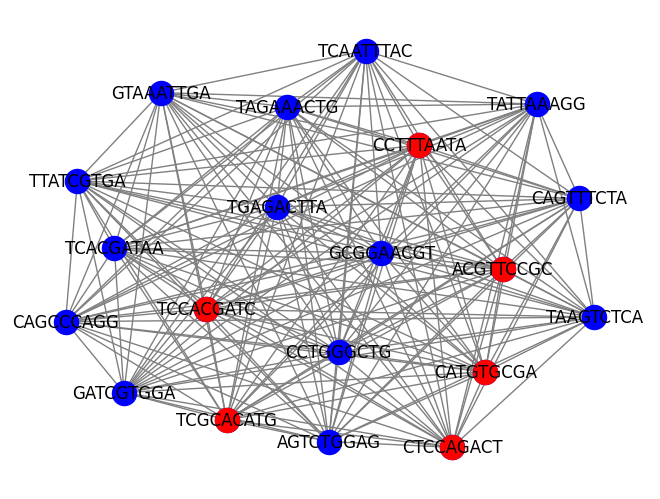

In [57]:
# Function to find n nodes with the minimal total distance
def find_minimal_distance_subset(G, n):
    best_nodes = None
    min_distance = float('inf')
    
    # Iterate over all possible starting nodes
    for node in G.nodes:
        # Get distances from the current node to all others
        distances = nx.single_source_dijkstra_path_length(G, node)
        
        # Find the n-1 closest nodes (excluding self)
        closest_nodes = sorted(distances, key=distances.get)[1:n]
        
        # Calculate the total distance for these nodes
        total_distance = sum(distances[n] for n in closest_nodes)
        
        # Check if this is the best (minimal) distance found so far
        if total_distance < min_distance:
            min_distance = total_distance
            best_nodes = [node] + closest_nodes
    
    return best_nodes, min_distance

# Example usage
n = 6  # Size of the subset
best_subset, best_distance = find_minimal_distance_subset(G, n)
print("Best subset of nodes:", best_subset)
print("With minimal total distance:", best_distance)

# Draw the graph with the subset highlighted
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='blue', edge_color='gray')
nx.draw_networkx_nodes(G, pos, nodelist=best_subset, node_color='red')
plt.show()

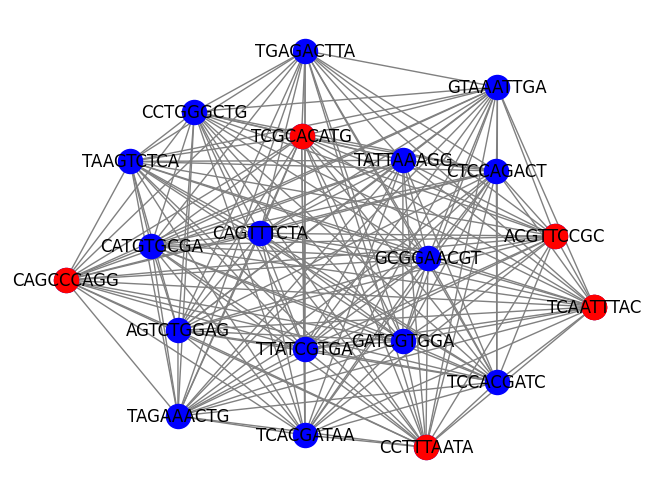

In [38]:
def closest_nodes_via_mst(G, n):
    """
    Find a subset of n vertices in graph G that are closest to each other based on the MST approach.
    
    Parameters:
    - G (nx.Graph): The input graph with weights representing distances.
    - n (int): The number of vertices to select.
    
    Returns:
    - list: A list of n vertices that are closest to each other.
    """
    if n > len(G):
        raise ValueError("n must be less than or equal to the number of vertices in the graph")
    
    # Step 1: Generate the Minimum Spanning Tree (MST) of the graph
    mst = nx.minimum_spanning_tree(G)
    
    # Step 2: We need to find n nodes in this MST that are closely connected.
    # This problem itself is not trivial and can be considered as finding the densest subgraph of size n.
    # For simplicity, let's find the longest path in the MST and pick the first n nodes as a heuristic.
    # Note: This is just a heuristic and might not give the optimal set of nodes.
    # To actually solve this, we might need to use more advanced techniques.
    longest_path = nx.approximation.traveling_salesman_problem(mst, cycle=False)
    
    if len(longest_path) >= n:
        # Select the first n nodes from the longest path
        selected_nodes = longest_path[:n]
    else:
        # If the longest path has fewer than n nodes, we take what we can get (very unlikely in a connected graph)
        selected_nodes = longest_path
    
    return selected_nodes

# Comment out the function call
best_subset = closest_nodes_via_mst(G, 6)

# Draw the graph with the subset highlighted
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='blue', edge_color='gray')
nx.draw_networkx_nodes(G, pos, nodelist=best_subset, node_color='red')
plt.show()